# Loan Prediction Project

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 15-Oct-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [Loan Prediction](https://www.kaggle.com/datasets/ninzaami/loan-predication)

## Introduction:
Predicting whether a loan will be approved or not is a significant task for financial institutions. Accurate predictions can help minimize the risk of lending while ensuring eligible individuals receive the financial support they need. The Loan Prediction dataset contains information about individuals applying for loans, including demographic information, loan-specific data, and whether the loan was approved or rejected. The objective is to use machine learning techniques to predict the loan approval status (Loan_Status) based on the available data.

## Objective:
  The objective of this project is to build a classification model that predicts whether a loan will be approved or not based on various features such as income, education level, marital status, and credit history. The main goals are:

* Handle missing values appropriately.
* Explore and visualize the data.
* Encode categorical features.
* Build a predictive model using Support Vector Machine (SVM).
* Evaluate the model's performance and draw conclusions.
---


## 1. Importing Libraries

In [61]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Dataset

In [62]:
# loading and reviewing the dataset
df = pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Observation:
* The dataset has several missing values that need to be handled before proceeding with model development.

In [64]:
# checking out the missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Observation:
* There are missing values in LoanAmount, Loan_Amount_Term, Credit_History, Gender, Married, Dependents, and Self_Employed. These need to be imputed.

## 3. Exploratory Data Analysis

In [65]:
# Handling missing values - Imputing numerical columns with mean and categorical columns with mode
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

### Observation:
* All missing values have been handled by imputing numerical columns with the mean and categorical columns with the mode.

In [66]:
# Verifying the missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
# checking out the statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Observation:
* The summary provides an overview of the distribution of numerical columns, including LoanAmount, ApplicantIncome, and others. Some columns, such as Credit_History, are binary.

In [68]:
# checking out the value counts of the target variable
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

### Observation:
* There is a slight imbalance in the target variable, with more approved loans (Loan_Status = Y) than rejected loans.

In [69]:
# label encoding the target variable 1 for yes and 0 for no
df.replace({"Loan_Status": {"Y": 1, "N": 0}}, inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [70]:
# checking out the value counts of the dependents variable
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [30]:
# replacing all the 3+ in the Dependents variable with 3
df = df.replace(to_replace='3+', value=3)
df['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

### Observation:
* The Dependents column had a value of 3+, which was replaced with 3 for simplicity.

In [31]:
# Encoding categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

In [32]:
# One-hot encoding for Education and Property_Area
df = pd.get_dummies(df, columns=['Education', 'Property_Area'], drop_first=True)

### Observation:
* Categorical variables such as Gender, Married, Self_Employed, Education, and Property_Area have been successfully encoded for model development.

In [33]:
# Dropping Loan_ID as it's irrelevant for the prediction
df.drop('Loan_ID', axis=1, inplace=True)

## 4. Visualizing the data

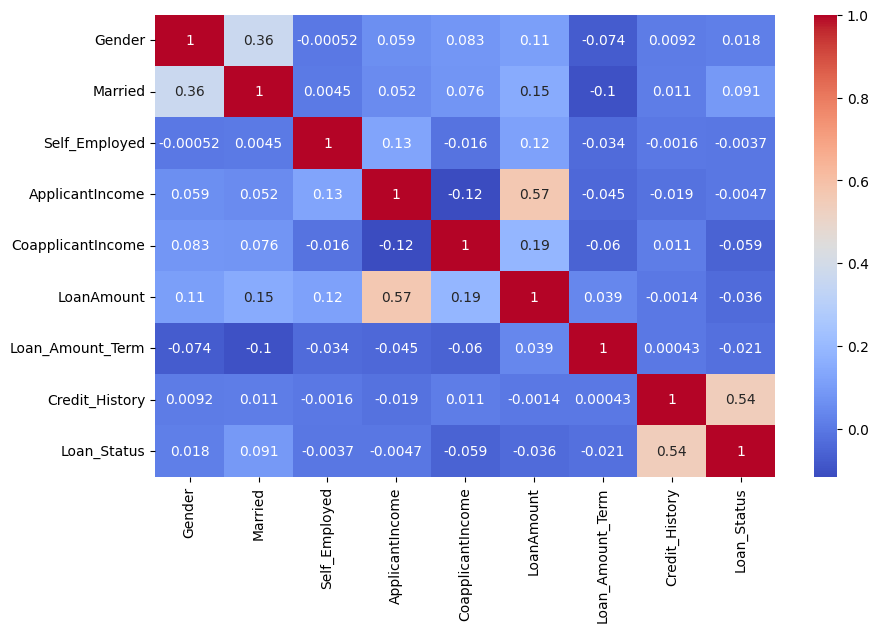

In [34]:
# Creating a heatmap for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Observation:
* The heatmap shows that Credit_History has a strong positive correlation with the target variable Loan_Status.

## 5. Training and building the SVM Model

In [35]:
# seperating the features and target variable
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
# training the SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

## 6. Model Evaluation

In [39]:
# testing the model
X_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(X_train_pred, y_train)
print(f"Train Accuracy: {train_accuracy}")
X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(X_test_pred, y_test)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.7983706720977597
Test Accuracy: 0.7723577235772358


In [51]:
# predicting the loan status
user_input = [0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0]
user_input = np.array(user_input).reshape(1, -1)

if model.predict(user_input) == 1:
    print("Loan Status: Approved")
else:
    print("Loan Status: Not Approved")

Loan Status: Approved


## Conclusion and Summary:
In this project, we successfully built a model to predict loan approval using SVM. After preprocessing the dataset by handling missing values and encoding categorical features, we built an SVM classifier that achieved an accuracy of approximately 77% on the test data. Key observations from this project are:

* Credit History is the most important feature affecting loan approval.
* The model can be further improved by tuning hyperparameters or trying different algorithms like Random Forest or XGBoost.
This project demonstrates a basic loan prediction system that could be used by financial institutions to streamline their loan approval processes.